In [17]:
import numpy as np
import pandas as pd
import os
import glob
import re
import matplotlib.pyplot as plt
import seaborn as sns
import re
from pathlib import Path
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

# load in directories
from experiment_code.constants import Defaults
from experiment_code import preprocess
from experiment_code.targetfile_utils import Utils
from experiment_code.preprocess import ExpSentences
from experiment_code.participants.participant_database_ana import AtaxiaAna, ControlAna
from experiment_code.visualization.visualize import CoRTLanguageExp
from experiment_code.visualization.visualize_participants import MyParticipants

In [18]:
cort = CoRTLanguageExp() 
df_exp = cort.load_dataframe()
df_exp

,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,sentence_num,...,negative,tense,spelling_modified,trial_type,version,version_descript,group_cloze_condition,group_CoRT_condition,group_trial_type,cloze_cort
311,20/07/2020 16:18:19,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,222.0,25,...,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: high cloze,control: non-CoRT,control: meaningless,"non-CoRT, high cloze"
324,20/07/2020 16:18:26,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,223.0,26,...,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: high cloze,control: CoRT,control: meaningless,"CoRT, high cloze"
337,20/07/2020 16:18:32,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,224.0,27,...,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: non-CoRT,control: meaningful,"non-CoRT, low cloze"
350,20/07/2020 16:18:39,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,225.0,28,...,no,past,yes,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: non-CoRT,control: meaningful,"non-CoRT, low cloze"
363,20/07/2020 16:18:45,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,226.0,29,...,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: CoRT,control: meaningful,"CoRT, low cloze"
374,20/07/2020 16:18:51,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,227.0,30,...,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: non-CoRT,control: meaningless,"non-CoRT, low cloze"
385,20/07/2020 16:18:56,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,228.0,31,...,no,past,no,meaningful,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: high cloze,control: non-CoRT,control: meaningful,"non-CoRT, high cloze"
397,20/07/2020 16:19:02,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,229.0,32,...,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: CoRT,control: meaningless,"CoRT, low cloze"
409,20/07/2020 16:19:08,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,230.0,33,...,no,past,no,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: low cloze,control: non-CoRT,control: meaningless,"non-CoRT, low cloze"
421,20/07/2020 16:19:14,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,231.0,34,...,no,present,yes,meaningless,10,CONCAT OF 7-9. Shortened to 5 runs (experiment),control: high cloze,control: non-CoRT,control: meaningless,"non-CoRT, high cloze"


In [19]:
df_exp.groupby(['participant_public_id', 'participant_id', 'experiment_id']).size()

participant_public_id  participant_id  experiment_id
sAA                    c01             21978.0          320
sAA1                   p12             21979.0          320
sAA2                   p07             21979.0          320
sAA3                   c04             23648.0          320
sAE                    c02             21978.0          320
sAI2                   p09             21979.0          320
sAM1                   p17             23648.0          320
sAN                    p16             23648.0          320
sEA                    p02             21979.0          320
sEA1                   c15             23648.0          320
sEE                    c12             23648.0          320
sEE2                   c11             23648.0          320
sEO1                   c07             23648.0          320
sEO2                   c03             23648.0          320
sHI                    c08             23648.0          320
sHL                    c13             23648.0 

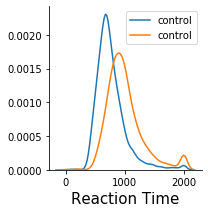

In [20]:
#self.group = df_exp["group"]
dist = sns.FacetGrid(df_exp, hue="group")
dist = dist.map(sns.distplot, "rt", hist=False)
plt.legend(df_exp["group"], fontsize=10)
plt.xlabel('Reaction Time', fontsize=15)
#plt.title(f'Distribution of years of education for available participants', fontsize=20);
plt.xticks(fontsize=10)
plt.yticks(fontsize=10);

plt.show()

In [21]:
len(df_exp['participant_public_id'].unique())

31

In [22]:
df_exp.columns

Index(['local_date', 'experiment_id', 'experiment_version',
       'participant_public_id', 'participant_id', 'task_name', 'task_version',
       'spreadsheet_version', 'spreadsheet_row', 'sentence_num', 'zone_type',
       'rt', 'response', 'attempt', 'correct', 'incorrect', 'display',
       'block_num', 'randomise_blocks', 'full_sentence', 'last_word',
       'sampled', 'CoRT_descript', 'CoRT_mean', 'condition_name', 'CoRT_std',
       'cloze_descript', 'cloze_probability', 'dataset', 'random_word',
       'target_word', 'word_count', 'group', 'cause_effect', 'dynamic_verb',
       'orientation', 'negative', 'tense', 'spelling_modified', 'trial_type',
       'version', 'version_descript', 'group_cloze_condition',
       'group_CoRT_condition', 'group_trial_type', 'cloze_cort'],
      dtype='object')

In [23]:
par = MyParticipants() 
df_par = par.load_dataframe()
df_par.head()
#select needed columns
#change df so inputs match and melt (or groupby)
#mean moca and sara

,subj_id,public_id,name,email,group,date_of_contact,date_of_followup,participated,date_of_completion,compensated,...,updrs_gait_29,updrs_post_stability_30,updrs_bradykinesia_31,MOCA_total_possible,SARA_total_possible,current_date,date_of_testing_iso,dob_iso,days_passed,age
5,AC1010,sAM1,Mary Witcher Smith,trolaumars@msn.com,SCA,10/2/20,NaN,yes,10/12/20,yes,...,NaN,NaN,NaN,NaN,40.0,2021-04-21,2018-10-07,NaT,927.0,NaN
6,AC1010,sAM1,Mary Witcher Smith,trolaumars@msn.com,SCA,10/2/20,NaN,yes,10/12/20,yes,...,NaN,NaN,NaN,NaN,40.0,2021-04-21,2019-11-08,NaT,530.0,NaN
7,AC1010,sAM1,Mary Witcher Smith,trolaumars@msn.com,SCA,10/2/20,NaN,yes,10/12/20,yes,...,NaN,NaN,NaN,NaN,NaN,2021-04-21,2020-08-26,NaT,238.0,NaN
8,AC1010,sAM1,Mary Witcher Smith,trolaumars@msn.com,SCA,10/2/20,NaN,yes,10/12/20,yes,...,NaN,NaN,NaN,30.0,NaN,2021-04-21,2018-04-21,1961-07-08,1096.0,59.827397
9,AC1010,sAM1,Mary Witcher Smith,trolaumars@msn.com,SCA,10/2/20,NaN,yes,10/12/20,yes,...,NaN,NaN,NaN,NaN,NaN,2021-04-21,2019-04-21,NaT,731.0,NaN


In [24]:
df_par.columns

Index(['subj_id', 'public_id', 'name', 'email', 'group', 'date_of_contact',
       'date_of_followup', 'participated', 'date_of_completion', 'compensated',
       'comp_method', 'completed_feedback', 'database inclusion',
       'additional_comments', 'date_of_testing', 'online_frequency',
       'principal_investigator', 'experimenter', 'exp_id', 'payment_method',
       'in person', 'dob', 'handedness', 'gender', 'years_of_education',
       'neuro_taken', 'moca_taken', 'current_medications',
       'sig_medical_changes', 'performance_quality', 'comments',
       'MOCA_total_score', 'MOCA_relative_score(fraction)', 'MOCA_nonmotor',
       'moca_vs', 'moca_name', 'moca_att', 'moca_lang', 'moca_abst',
       'moca_recall', 'moca_orient', 'SARA_total_score',
       'SARA_relative_score(fraction)', 'sara_self_report_1-3',
       'sara_observe_4-8', 'sara_gait_1', 'sara_stance_2', 'sara_sitting_3',
       'sara_speech_4', 'sara_finger_chase_5r', 'sara_finger_chase_5l',
       'sara_finger

In [25]:
df_par = df_par[['public_id', 'handedness', 'gender', 'years_of_education', 'age','MOCA_total_score', 'SARA_total_score']]

In [26]:
df_par['MOCA_total_score'] = pd.to_numeric(df_par['MOCA_total_score'])#.astype(float)
df_par.dtypes

public_id              object
handedness             object
gender                 object
years_of_education     object
age                   float64
MOCA_total_score      float64
SARA_total_score      float64
dtype: object

In [28]:
df_par_grouped = df_par.groupby(['public_id', 'gender', 'years_of_education', 'age']).agg({'MOCA_total_score': ['mean', 'std'], 'SARA_total_score': ['mean', 'std']}).reset_index()

# join multilevel columns
df_par_grouped.columns = ["_".join(pair) for pair in df_par_grouped.columns]
df_par_grouped.columns = df_par_grouped.columns.str.strip('_')
df_par_grouped

#change agg column names
df_par_grouped.columns = df_par_grouped.columns.str.replace('_total_score_','_')
df_par_grouped

,public_id,gender,years_of_education,age,MOCA_mean,MOCA_std,SARA_mean,SARA_std
0,sAA,M,16,51.931507,28.0,NaN,NaN,NaN
1,sAA1,F,18,42.704110,28.0,NaN,20.0,NaN
2,sAA2,F,12,81.328767,26.0,NaN,18.5,NaN
3,sAA3,M,12,37.101370,22.0,NaN,NaN,NaN
4,sAE,M,16,51.413699,26.0,NaN,NaN,NaN
5,sAI2,M,19,58.065753,29.0,NaN,6.0,NaN
6,sAM1,F,12,59.827397,27.0,NaN,NaN,NaN
7,sAN,F,18,53.808219,27.0,NaN,17.0,NaN
8,sEA,F,18,56.495890,27.0,NaN,NaN,NaN
9,sEA1,F,18,74.317808,30.0,NaN,NaN,NaN


In [ ]:
df_par['public_id'].value_counts()

In [33]:
og_par = df_par['public_id'].unique()
new_par = df_par_grouped['public_id'].unique()
list(set(og_par).symmetric_difference(new_par))

['sHO', 'sEE']

In [62]:
df_par = df_par[['public_id', 'gender', 'years_of_education', 'age','MOCA_total_score','SARA_total_score']]
#df_par.query('public_id == ')
df_par[df_par['public_id'].isin(['sHO', 'sEE'])]

,public_id,gender,years_of_education,age,MOCA_total_score,SARA_total_score
56,sHO,F,22,NaN,NaN,NaN
57,sHO,NaN,NaN,NaN,NaN,NaN
58,sHO,NaN,NaN,48.375342,NaN,NaN
71,sEE,F,16,NaN,28.0,NaN
72,sEE,F,16,NaN,NaN,NaN
73,sEE,F,16,NaN,NaN,NaN


In [70]:
sHO = np.array(['sHO', 'F', 22, 'NaN', 'NaN', 'NaN'])
sEE = np.array(['sEE', 'F', 16, 'NaN', 28.0, 'NaN'])
columns = ['public_id', 'gender', 'years_of_education', 'age','MOCA_total_score','SARA_total_score']
df_par_add_1 = pd.DataFrame(np.reshape(sHO, (1,len(sHO))),columns=columns)
df_par_add_2 = pd.DataFrame(np.reshape(sEE, (1,len(sEE))),columns=columns)
df_par_add = pd.concat([df_par_add_1, df_par_add_2])

In [71]:
df_par_grouped = pd.concat([df_par_grouped, df_par_add])

In [72]:
#repeats trial row for each row that participant has in df
#df_exp.merge(df_par, how = "left", left_on = "participant_public_id", right_on = "public_id")

In [73]:
#lose too much information this way (first or last)
#utilize FOR NOW
#how affect model if missing info for some participants? metion ratios in methods?
#df_par_min = df_par.drop_duplicates('public_id')
#df_par_min.head()

In [74]:
#df_par_min['MOCA_total_score']

In [75]:
df_merged = df_exp.merge(df_par_grouped, how = "left", left_on = "participant_public_id", right_on = "public_id")
df_merged

,local_date,experiment_id,experiment_version,participant_public_id,participant_id,task_name,task_version,spreadsheet_version,spreadsheet_row,sentence_num,...,MOCA_mean,MOCA_std,MOCA_total_score,SARA_mean,SARA_std,SARA_total_score,age,gender,public_id,years_of_education
0,20/07/2020 16:18:19,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,222.0,25,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
1,20/07/2020 16:18:26,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,223.0,26,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
2,20/07/2020 16:18:32,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,224.0,27,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
3,20/07/2020 16:18:39,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,225.0,28,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
4,20/07/2020 16:18:45,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,226.0,29,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
5,20/07/2020 16:18:51,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,227.0,30,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
6,20/07/2020 16:18:56,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,228.0,31,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
7,20/07/2020 16:19:02,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,229.0,32,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
8,20/07/2020 16:19:08,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,230.0,33,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16
9,20/07/2020 16:19:14,21978.0,5.0,sAA,c01,cort_prepilot_task,34.0,FINAL sentences,231.0,34,...,28.0,NaN,NaN,NaN,NaN,NaN,51.9315,M,sAA,16


In [76]:
df_merged.columns

Index(['local_date', 'experiment_id', 'experiment_version',
       'participant_public_id', 'participant_id', 'task_name', 'task_version',
       'spreadsheet_version', 'spreadsheet_row', 'sentence_num', 'zone_type',
       'rt', 'response', 'attempt', 'correct', 'incorrect', 'display',
       'block_num', 'randomise_blocks', 'full_sentence', 'last_word',
       'sampled', 'CoRT_descript', 'CoRT_mean', 'condition_name', 'CoRT_std',
       'cloze_descript', 'cloze_probability', 'dataset', 'random_word',
       'target_word', 'word_count', 'group', 'cause_effect', 'dynamic_verb',
       'orientation', 'negative', 'tense', 'spelling_modified', 'trial_type',
       'version', 'version_descript', 'group_cloze_condition',
       'group_CoRT_condition', 'group_trial_type', 'cloze_cort', 'MOCA_mean',
       'MOCA_std', 'MOCA_total_score', 'SARA_mean', 'SARA_std',
       'SARA_total_score', 'age', 'gender', 'public_id', 'years_of_education'],
      dtype='object')

In [77]:
df_merged.groupby(['participant_public_id', 'participant_id']).size()

participant_public_id  participant_id
sAA                    c01               320
sAA1                   p12               320
sAA2                   p07               320
sAA3                   c04               320
sAE                    c02               320
sAI2                   p09               320
sAM1                   p17               320
sAN                    p16               320
sEA                    p02               320
sEA1                   c15               320
sEE                    c12               640
sEE2                   c11               320
sEO1                   c07               320
sEO2                   c03               320
sHI                    c08               320
sHL                    c13               320
sHO                    p03               640
sHUA                   p13               320
sIA                    c14               320
sIL                    p14               320
sIN                    p01               320
sIN1             

In [78]:
out_dir = os.path.join(Defaults.PROCESSED_DIR, "merged_preprocessed_dataframe.csv")
df_merged.to_csv(out_dir, header = True) 

## Reviewed df stats

In [13]:
out_dir = os.path.join(Defaults.PROCESSED_DIR, "preprocessed_dataframe")
df.to_csv(out_dir) 

In [25]:
df = pd.read_csv(os.path.join(Defaults.RAW_DIR, f"cort_language_gorilla_v7.csv"))

In [26]:
def _get_response_type():
    response_type = "response_keyboard_single"
    return response_type

def _assign_trialtype(x):
    if x==False:
        value = "meaningful"
    elif x==True:
        value = "meaningless"
    else:
        value = x
    return value

def _rename_cols(df):
    """rename some columns for analysis
    """
    return df.rename({'Local Date':'local_date','Experiment ID':'experiment_id', 'Experiment Version':'experiment_version', 'Participant Public ID':'participant_public_id', 'Participant Private ID':'participant_id', 
                'Task Name':'task_name', 'Task Version':'task_version', 'Spreadsheet Name':'spreadsheet_version', 'Spreadsheet Row': 'spreadsheet_row', 'Trial Number': 'sentence_num', 'Zone Type':'zone_type', 
                'Reaction Time':'rt', 'Response':'response', 'Attempt':'attempt', 'Correct':'correct', 'Incorrect':'incorrect'}, axis=1)
    

# determine which cols to keep depending on task

df = df.filter({'Local Date', 'Experiment ID', 'Experiment Version', 'Participant Public ID', 'Participant Private ID',
        'Task Name', 'Task Version', 'Spreadsheet Name', 'Spreadsheet Row', 'Trial Number', 'Zone Type', 
        'Reaction Time', 'Response', 'Attempt', 'Correct', 'Incorrect', 'display', 'block_num', 'randomise_blocks',
        'full_sentence', 'last_word', 'sampled','CoRT_descript', 'CoRT_mean','condition_name',
        'CoRT_std','cloze_descript', 'cloze_probability', 'dataset', 'random_word', 'target_word', 'word_count'})

#rename some columns for analysis
df = _rename_cols(df)

# filter dataset to include trials and experimental blocks (i.e. not instructions)
response_type = _get_response_type() # response_type is different across the task
df = df.query(f'display=="trial" and block_num>0 and zone_type=="{response_type}"')
df['rt'] = df['rt'].astype(float)  

In [35]:
blocks = df.groupby('participant_id').apply(lambda x: x.sort_values('block_num').block_num).values
blocks

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
        4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 

In [30]:
df['block_num'] = blocks

ValueError: Length of values does not match length of index

In [ ]:
# correct block_num to be sequential
df['block_num'] = df.apply(lambda x: x.sort_values('block_num').block_num).values
        
# get meaningful assesment
df['trial_type'] = df['sampled'].apply(lambda x: _assign_trialtype(x))

# get version
df["version"] = version

# get condition name (make sure it's just characters)
df['condition_name'] = df['condition_name'].str.extract('([a-zA-Z]*)')

df